In [1]:
import json
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import pandas as pd
import seaborn as sns
from collections import Counter
from itertools import combinations
from collections import defaultdict

# 中文显示配置（如果需要）
plt.rcParams['font.sans-serif'] = ['SimHei']  # 替换为系统中有的中文字体
plt.rcParams['axes.unicode_minus'] = False

def load_and_analyze(metadata_path, recipes_path):
    """加载数据并进行分析"""
    with open(metadata_path, "r", encoding="utf-8") as f:
        metadata = json.load(f)
    with open(recipes_path, "r", encoding="utf-8") as f:
        recipes = json.load(f)
    
    df_books = pd.DataFrame(metadata)
    df_recipes = pd.DataFrame(recipes)
    
    print(f"\n{'='*50}")
    print(f"数据集概览")
    print(f"书籍数量: {len(df_books)}")
    print(f"菜谱数量: {len(df_recipes)}")
    print(f"最早出版年份: {df_books['date'].min()}" if 'date' in df_books.columns else "")
    print(f"民族分类数量: {df_books['ethnic_group'].nunique()}")
    print(f"菜系类别数量: {df_books['class1'].nunique()}")
    
    return df_books, df_recipes



In [2]:
df_books, df_recipes = load_and_analyze("cookbooks_extracted_metadata.json", "cookbooks_extracted_recipes.json")


数据集概览
书籍数量: 74
菜谱数量: 43670
最早出版年份: 1803
民族分类数量: 13
菜系类别数量: 7


In [3]:
df_recipes['ethnic_group'].value_counts().head(10)

ethnic_group
           37750
jewish      3407
creole       939
italian      300
french       276
english      179
german       152
spanish      123
chinese       66
russian       53
Name: count, dtype: int64

In [4]:
df_books.head()

,book_id,title,subject,author,publisher,publish_region,date,language,region,subregion,ethnic_group,type,class1,class2
0,amwh,"The American Woman's Home: or, Principles of D...","[Womencooks, Homeeconomics]","[Catharine Esther Beecher, Harriet Beecher Stowe]","New York, J. B. Ford and Company; Boston, H. A...","New York, Boston",1869,en,general,,,famous,foodandnonfood,
1,army,Manual For Army Cooks,"[Cookery,Military, Cookery,American]",[United States War Department.],Washington: Government Printing Office.,Washington,1896.,en,general,,,general,generalfood,
2,aunt,"""Aunt Babette's"" Cook Book Foreign and Domesti...","[Cookery,Jewish, Cookery]","[""Aunt Babette""]",Cincinnati and Chicago: The Bloch Publishing a...,Cincinnati; Chicago,1889,en,ethnic,,jewish,general,foodandnonfood,
3,bart,The Ideal Bartender,"[Cookery,AfricanAmerican, Liquors]",[Tom Bullock],St. Louis: Buxton & Skinner Printing and Stati...,St. Louis,1917,en,general,,,general,beverages,
4,beec,Miss Beecher's Domestic Receipt Book: Designed...,"[Cookery,American]",[Catharine Esther Beecher],"New York: Harper, 1850, c1846.",New York,1850,en,general,,,famous,foodandnonfood,


In [5]:
df_recipes.head()

,book_id,name,class1,class2,ethnic_group,region,ingredients,implements,variations
0,amwh,"café noir, or black coffee.",beverages,,,,"[coffee, water]",[coffee-pot],"[{'name': 'café-au-lait,', 'ingredients': ['be..."
1,army,STOCK,soups,,,,"[bone, dripping, fat, jelly, lean beef, meat, ...",[],[]
2,army,VEGETABLE SOUP (FROM STOCK,soups,,,,"[pepper, rice, salt, stock, water]",[],[]
3,army,TOMATO STOCK,soups,,,,"[pepper, salt, stock, tomato]",[],[]
4,army,BARLEY STOCK,soups,,,,"[barley, pearl barley, pepper, salt, stock, wa...",[],[]


In [6]:
# 统计 ethnic_group 中空值和空字符串
empty_str_count = (df_books['ethnic_group'].astype(str).str.strip() == '').sum()
nan_count = df_books['ethnic_group'].isna().sum()

print(f"Empty string count: {empty_str_count}")
print(f"NaN count: {nan_count}")


Empty string count: 61
NaN count: 0


C:\Users\Jiaqi\AppData\Local\Temp\ipykernel_66304\216932612.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(x_labels), y=recipe_counts.values, palette='Blues_r')


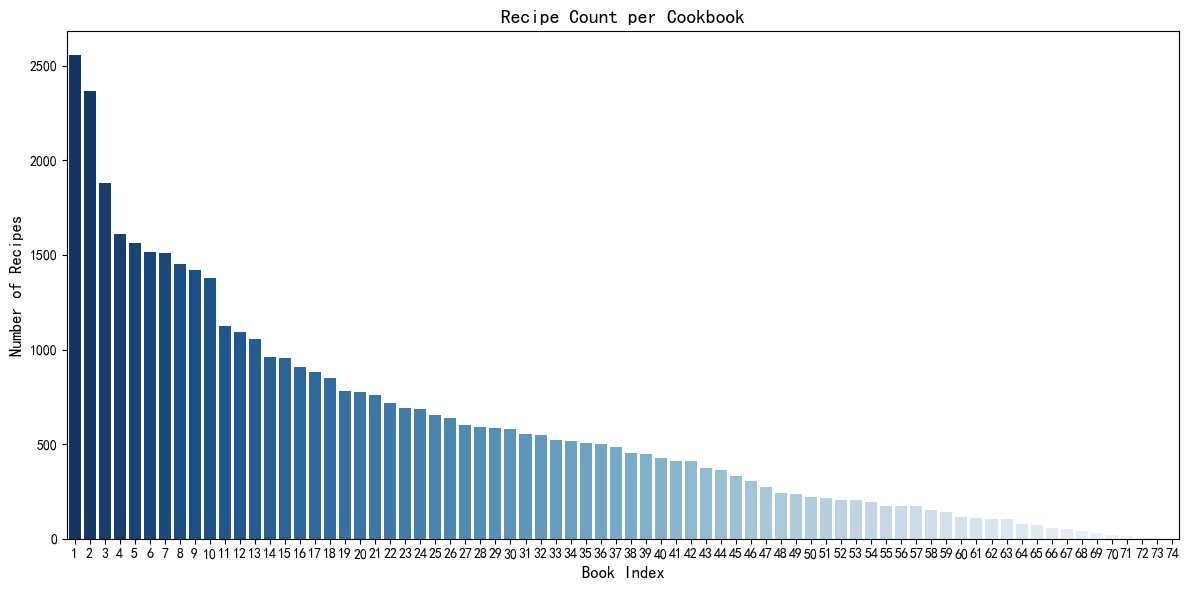

In [7]:
def plot_top_books(df_recipes, df_books, top_n=76):
    """
    绘制每本书中菜谱数量的分布（前 top_n 本书），横轴为 1~74 的数字
    """
    # 统计每本书的菜谱数量
    recipe_counts = df_recipes['book_id'].value_counts().head(top_n)
    
    # 生成横轴标签 1~76
    x_labels = range(1, len(recipe_counts) + 1)
    
    # 创建条形图
    plt.figure(figsize=(12, 6))
    sns.barplot(x=list(x_labels), y=recipe_counts.values, palette='Blues_r')
    plt.title(f"Recipe Count per Cookbook", fontsize=14)
    plt.xlabel("Book Index", fontsize=12)
    plt.ylabel("Number of Recipes", fontsize=12)
    plt.tight_layout()
    plt.show()

# 调用函数
plot_top_books(df_recipes, df_books, top_n=74)

In [8]:
# # 筛选出 subject 列为空值的书籍
# empty_subject_books = df_books[df_books['subject'].isna() | df_books['subject'].apply(lambda x: x == "Formulas")]

# # 打印对应的 book_id
# print(empty_subject_books['book_id'].tolist())

# print(df_books['subject'].value_counts())
# 筛选出 subject 列中包含 "Formulas" 的书籍
formulas_books = df_books[df_books['subject'].apply(lambda subjects: any("Ohio" in subject for subject in subjects))]

# 打印对应的 book_id
print(formulas_books['book_id'].tolist())

['pres']


C:\Users\Jiaqi\AppData\Local\Temp\ipykernel_66304\2874612637.py:66: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


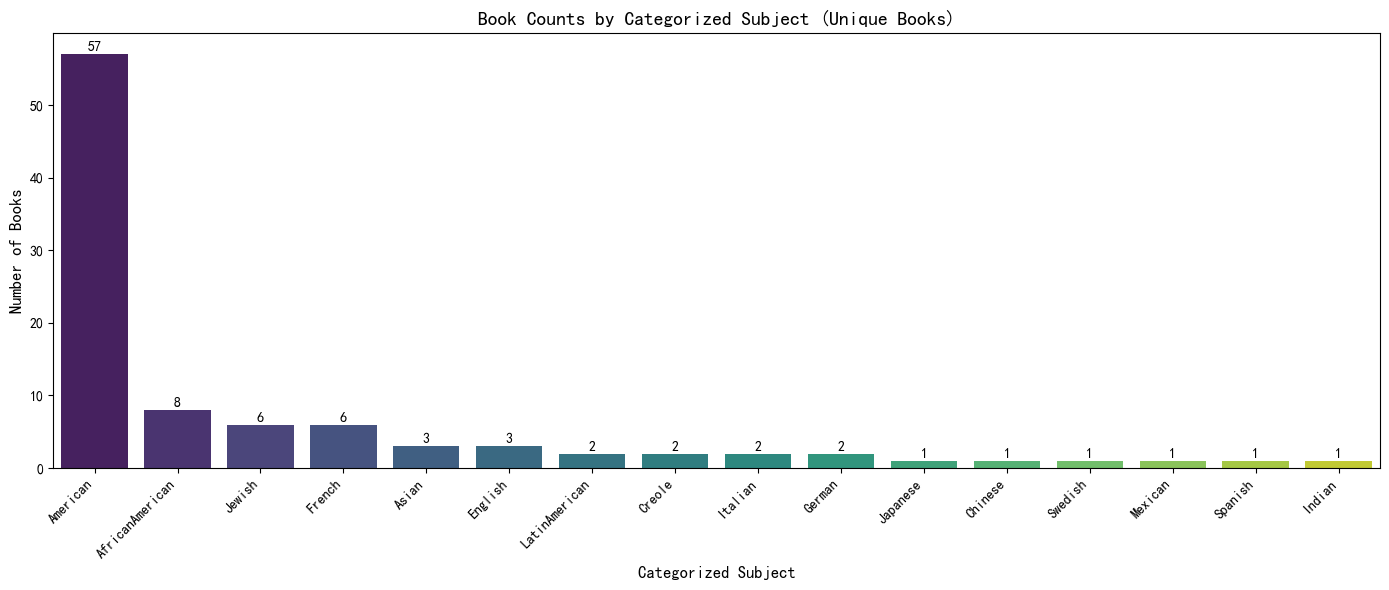

In [ ]:
# 创建 df_books 的副本
df_books_copy = df_books.copy()

# 示例：在副本上进行 subject 列的预处理
def preprocess_subjects(df):
    """Preprocess the subject column by removing unwanted categories and cleaning values."""
    # 定义需要移除的类别
    unwanted_categories = {"Cookery", "Recipes", "Menus", "Food", "Womencooks", 
                           "Confectionery", "Cookbooks", "Cookeryforthesick", "Liquors", 
                           "Vegetarianism", "Formula", "Medicine,Popular", "Chocolate", "Cocoa",
                           "Groceries", "Military", "Waiters", "Food--Dictionaries","Homeeconomics", 
                           "HomeEconomics","Diet","Juvenileliterature",
                           "Immigrants--UnitedStates"}
                            # 在这里增减需要移除的类别。这些都是与菜系/地域无关的类！
    
    # 处理每本书的 subject
    def clean_subjects(subjects):
        cleaned = []
        for subject in subjects:
            # 去掉以 "Cookery, " 开头的部分，仅保留后面的内容
            if subject.startswith("Cookery,"):
                subject = subject.replace("Cookery,", "").strip()
            # 去掉以 "Cookery-- " 开头的部分，仅保留后面的内容
            if subject.startswith("Cookery--"):
                subject = subject.replace("Cookery--", "").strip()
            # 如果不在移除列表中，则保留
            if subject not in unwanted_categories:
                cleaned.append(subject)
        return cleaned

    # 应用清理函数
    df['subject'] = df['subject'].apply(clean_subjects)

# 调用预处理函数
preprocess_subjects(df_books_copy)

# 创建一个新的列存储归类后的 subject
def categorize_subjects(subjects):
    """将所有 'American--XX'、'Northeastern'、'SouthernStates' 和 'Washington' 归类为 'American'"""
    categorized = []
    for subject in subjects:
        if subject.startswith("American--") or subject in {"Northeastern", "SouthernStates", "MiddleEastern",
                                                           "Washington","California","Quakercooking","Virginia","Kentucky",
                                                           "NewEngland","NewYork","Pennsylvania","Ohio",}:
                                                            # 归类为 'American'
            categorized.append("American")
        elif subject.startswith("Germans--"):
            categorized.append("German")
        else:
            categorized.append(subject)
    return categorized

# 在副本中创建一个新的列 'categorized_subject'
df_books_copy['categorized_subject'] = df_books_copy['subject'].apply(categorize_subjects)

# 确保每本书只计入一次
def plot_unique_categorized_subject_distribution(df):
    """Visualize book distribution by categorized subject, ensuring each book is counted only once."""

    # 展平 'categorized_subject' 列，将每本书的 subject 数组展开为单独的行
    unique_subjects = df.explode('categorized_subject')[['book_id', 'categorized_subject']].drop_duplicates()

    # 统计每个 subject 的出现次数
    subject_counts = unique_subjects['categorized_subject'].value_counts()

    # 创建图像
    plt.figure(figsize=(14, 6))
    ax = sns.barplot(
        x=subject_counts.index,
        y=subject_counts.values,
        palette="viridis"
    )

    plt.title("Book Counts by Categorized Subject (Unique Books)", fontsize=14)
    plt.xlabel("Categorized Subject", fontsize=12)
    plt.ylabel("Number of Books", fontsize=12)
    plt.xticks(rotation=45, ha="right")

    # 添加数值标签
    for p in ax.patches:
        ax.annotate(
            f"{p.get_height():.0f}",
            (p.get_x() + p.get_width() / 2., p.get_height()),
            ha="center", va="center",
            xytext=(0, 5),
            textcoords="offset points"
        )

    plt.tight_layout()
    plt.show()

# 调用函数
plot_unique_categorized_subject_distribution(df_books_copy)

C:\Users\Jiaqi\AppData\Local\Temp\ipykernel_66304\2028146413.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


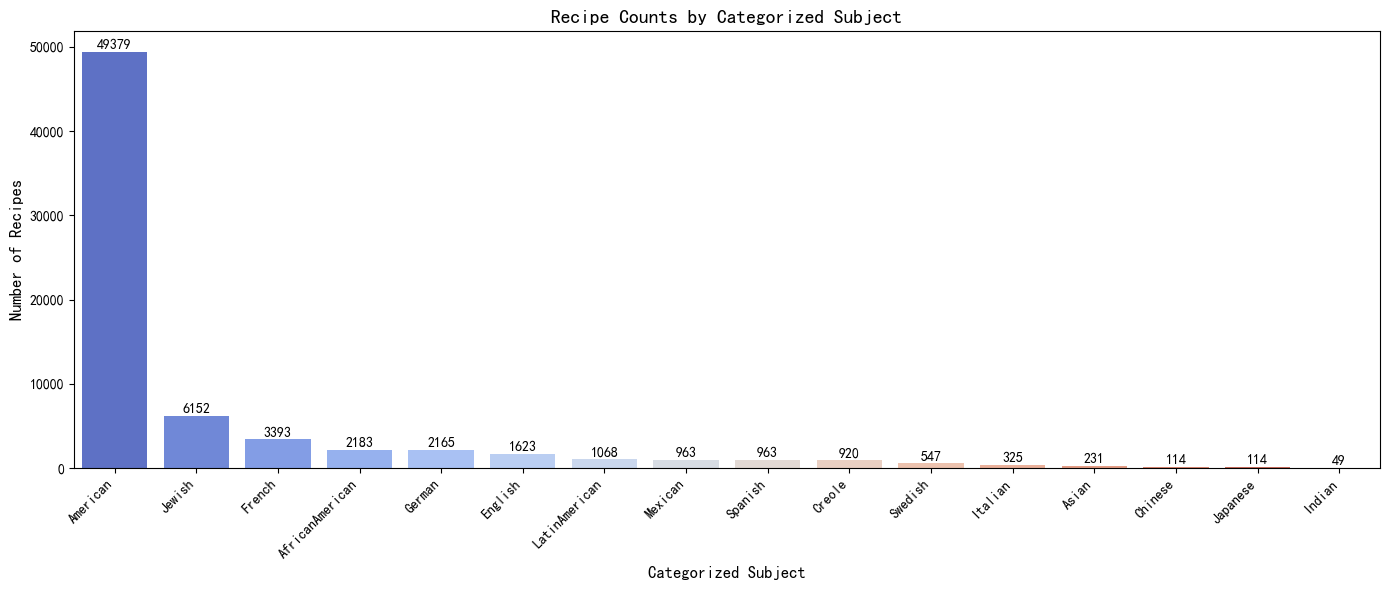

In [10]:
def plot_recipe_categorized_subject_distribution(df_books, df_recipes):
    """
    Visualize recipe distribution by categorized subject.
    每个食谱根据它所在的书的subject归类，统计数量。
    """

    # 把 df_books 的 book_id 和 categorized_subject 拿出来
    book_subjects = df_books[['book_id', 'categorized_subject']]

    # 需要先把 categorized_subject 也展开
    book_subjects_exploded = book_subjects.explode('categorized_subject')

    # 把食谱表 df_recipes 和 书本subject表 按 book_id合并
    recipes_with_subjects = df_recipes.merge(
        book_subjects_exploded,
        on='book_id',
        how='left'
    )

    # 统计每个 subject 的食谱数量
    subject_counts = recipes_with_subjects['categorized_subject'].value_counts()

    # 画图
    plt.figure(figsize=(14, 6))
    ax = sns.barplot(
        x=subject_counts.index,
        y=subject_counts.values,
        palette="coolwarm"
    )

    plt.title("Recipe Counts by Categorized Subject", fontsize=14)
    plt.xlabel("Categorized Subject", fontsize=12)
    plt.ylabel("Number of Recipes", fontsize=12)
    plt.xticks(rotation=45, ha="right")

    # 添加数值标签
    for p in ax.patches:
        ax.annotate(
            f"{p.get_height():.0f}",
            (p.get_x() + p.get_width() / 2., p.get_height()),
            ha="center", va="center",
            xytext=(0, 5),
            textcoords="offset points"
        )

    plt.tight_layout()
    plt.show()

# 调用新函数（注意要传 df_books_copy 和 df_recipes）
plot_recipe_categorized_subject_distribution(df_books_copy, df_recipes)


C:\Users\Jiaqi\AppData\Local\Temp\ipykernel_66304\4135259328.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


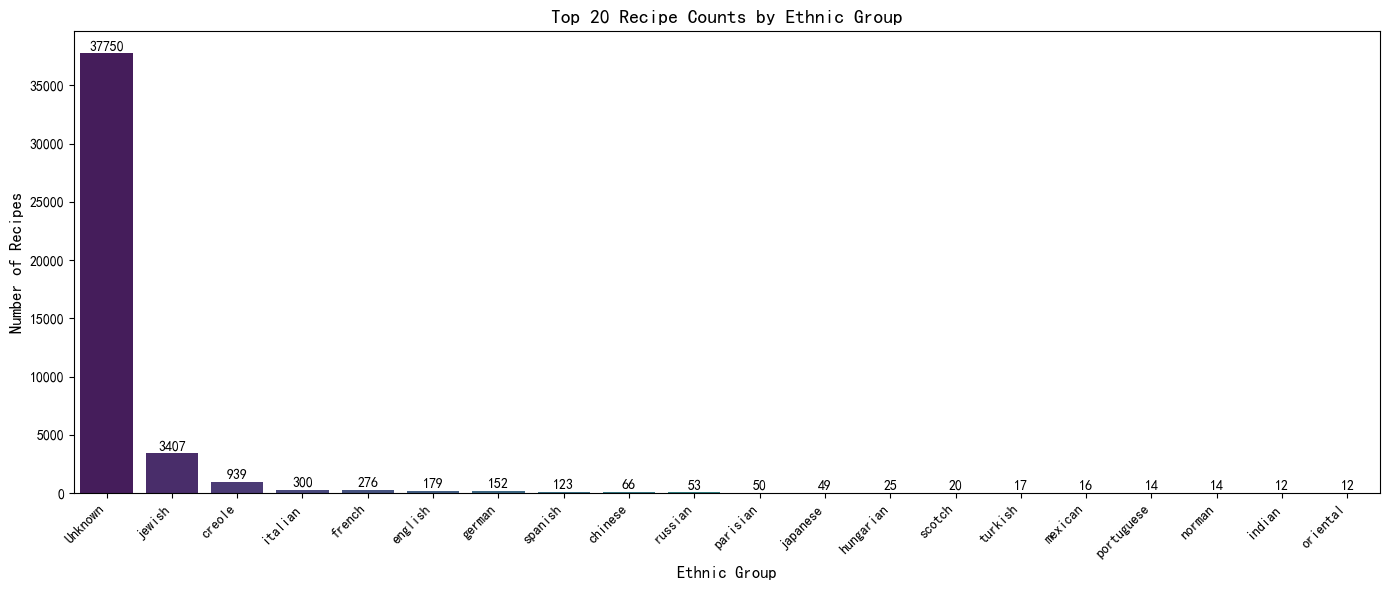

In [11]:
# 可视化1：民族分布
def plot_ethnic_distribution(df):
    """Visualize recipe distribution by ethnic group (Top 20)"""

    # 处理空字符串和 NaN
    df.loc[df['ethnic_group'].astype(str).str.strip() == '', 'ethnic_group'] = None
    df['ethnic_group'] = df['ethnic_group'].fillna('Unknown')

    # 获取前 20 个民族分类
    ethnic_counts = df['ethnic_group'].value_counts().head(20)

    # 创建图像
    plt.figure(figsize=(14, 6))
    ax = sns.barplot(
        x=ethnic_counts.index, 
        y=ethnic_counts.values,
        palette="viridis"
    )

    # 图标题和坐标轴（英文）
    plt.title("Top 20 Recipe Counts by Ethnic Group", fontsize=14)
    plt.xlabel("Ethnic Group", fontsize=12)
    plt.ylabel("Number of Recipes", fontsize=12)
    plt.xticks(rotation=45, ha="right")

    # 添加数值标签
    for p in ax.patches:
        ax.annotate(
            f"{p.get_height():.0f}", 
            (p.get_x() + p.get_width() / 2., p.get_height()),
            ha="center", va="center", 
            xytext=(0, 5), 
            textcoords="offset points"
        )

    plt.tight_layout()
    plt.show()
plot_ethnic_distribution(df_recipes)

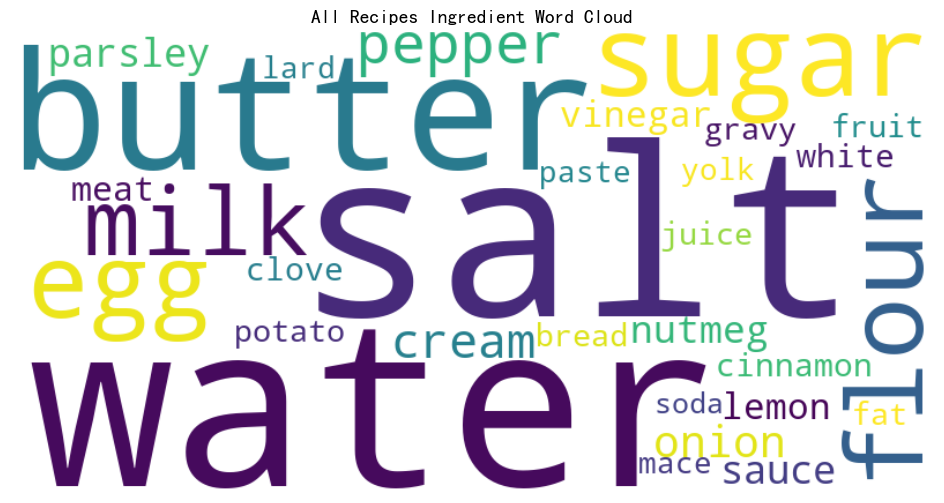

In [12]:
from wordcloud import WordCloud
from collections import Counter
import matplotlib.pyplot as plt

def generate_full_recipe_wordcloud(df, max_words=30):
    """Generate a word cloud for all recipes"""
    # 收集所有菜谱的食材
    all_ingredients = [
        ing
        for lst in df['ingredients']
        for ing in lst
    ]
    
    # 计算食材的频率
    freq = Counter(all_ingredients)
    filtered_freq = dict(freq.most_common(max_words))
    
    # 创建词云
    wc = WordCloud(
        width=800,
        height=400,
        background_color="white",
        colormap="viridis",
        max_words=max_words
    ).generate_from_frequencies(filtered_freq)

    # 展示图像
    plt.figure(figsize=(12, 6))
    plt.imshow(wc, interpolation="bilinear")
    plt.title("All Recipes Ingredient Word Cloud", fontsize=14)
    plt.axis("off")
    plt.show()

generate_full_recipe_wordcloud(df_recipes)

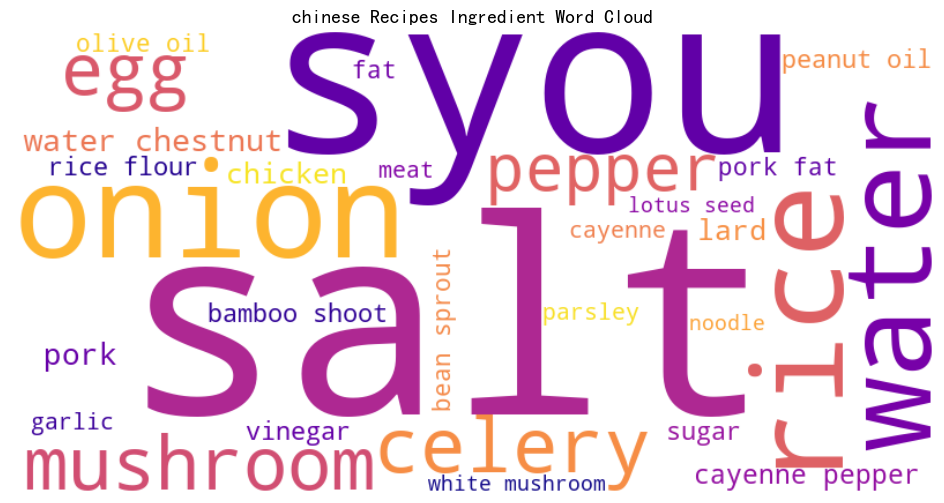

In [13]:
def generate_ethnic_group_wordcloud(df, ethnic_group, max_words=30):
    """Generate a word cloud for recipes belonging to a specific ethnic group."""
    # 筛选出指定 ethnic_group 的食谱
    subset = df[df['ethnic_group'] == ethnic_group]

    # 如果没有匹配的菜系，就提示一下
    if subset.empty:
        print(f"No recipes found for ethnic group: {ethnic_group}")
        return

    # 收集所有食材
    all_ingredients = [
        ing
        for lst in subset['ingredients']
        for ing in lst
    ]

    # 计算食材频率
    freq = Counter(all_ingredients)
    filtered_freq = dict(freq.most_common(max_words))

    # 创建词云
    wc = WordCloud(
        width=800,
        height=400,
        background_color="white",
        colormap="plasma",
        max_words=max_words
    ).generate_from_frequencies(filtered_freq)

    # 展示图像
    plt.figure(figsize=(12, 6))
    plt.imshow(wc, interpolation="bilinear")
    plt.title(f"{ethnic_group} Recipes Ingredient Word Cloud", fontsize=14)
    plt.axis("off")
    plt.show()

# 使用示例，比如画 German 菜系的食材词云
# generate_ethnic_group_wordcloud(df_recipes, ethnic_group="german")
generate_ethnic_group_wordcloud(df_recipes, ethnic_group="chinese")
# generate_ethnic_group_wordcloud(df_recipes, ethnic_group="english")


Common words: {'egg', 'milk', 'cinnamon', 'clove', 'white', 'salt', 'lemon', 'butter', 'sauce', 'meat', 'water', 'flour', 'nutmeg', 'onion', 'sugar', 'fat', 'vinegar', 'parsley', 'pepper', 'cream'}


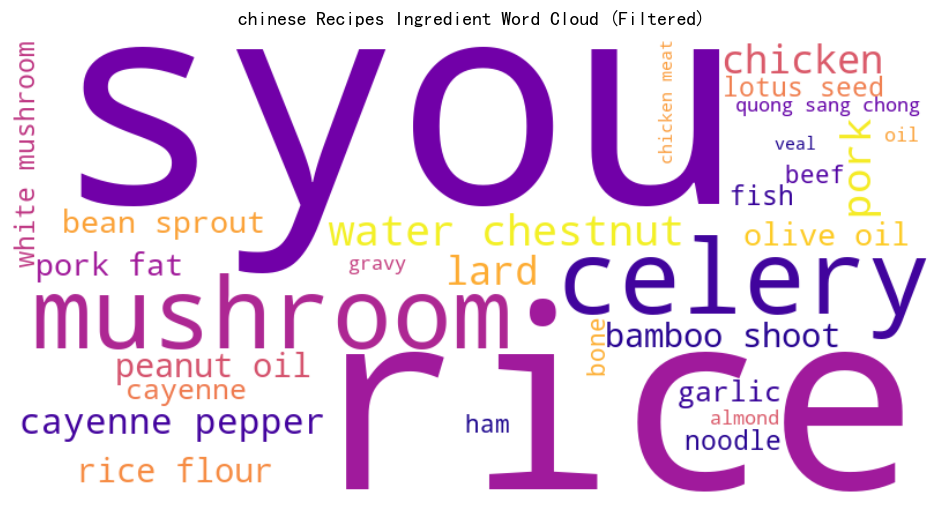

In [16]:
def generate_filtered_ethnic_group_wordcloud(df, ethnic_group, max_words=30, common_words=None):
    """Generate a word cloud for a specific ethnic group, excluding common words."""
    # 如果没有提供 common_words，则默认从全食谱中提取前20个常见词
    if common_words is None:
        # 收集所有食材
        all_ingredients = [
            ing
            for lst in df['ingredients']
            for ing in lst
        ]
        # 计算食材的频率
        freq = Counter(all_ingredients)
        common_words = {word for word, _ in freq.most_common(20)}  # 选出前20个常见词
        print(f"Common words: {common_words}")

    # 筛选出指定 ethnic_group 的食谱
    subset = df[df['ethnic_group'] == ethnic_group]

    # 如果没有匹配的菜系，就提示一下
    if subset.empty:
        print(f"No recipes found for ethnic group: {ethnic_group}")
        return

    # 收集所有食材
    all_ingredients = [
        ing
        for lst in subset['ingredients']
        for ing in lst
        if ing not in common_words  # 排除掉常见词
    ]
    # print(f"Filtered ingredients: {all_ingredients}")

    # 计算食材频率
    freq = Counter(all_ingredients)
    filtered_freq = dict(freq.most_common(max_words))

    # 创建词云
    wc = WordCloud(
        width=800,
        height=400,
        background_color="white",
        colormap="plasma",
        max_words=max_words
    ).generate_from_frequencies(filtered_freq)

    # 展示图像
    plt.figure(figsize=(12, 6))
    plt.imshow(wc, interpolation="bilinear")
    plt.title(f"{ethnic_group} Recipes Ingredient Word Cloud (Filtered)", fontsize=14)
    plt.axis("off")
    plt.show()

# 使用示例，过滤掉前20个常见词，画 German 菜系的食材词云
generate_filtered_ethnic_group_wordcloud(df_recipes, ethnic_group="chinese")
# generate_filtered_ethnic_group_wordcloud(df_recipes, ethnic_group="german")
